**Importação de Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import lightgbm as lgb
import warnings

print("Bibliotecas importadas!")

Bibliotecas importadas!


**Coleta e Tratamento dos Dados**

In [2]:
print("Iniciando carregamento final...")

try:
    # Encontrar os 3 arquivos na pasta data
    path_pattern = '../data/*.parquet'
    file_list = glob.glob(path_pattern)
    
    if len(file_list) != 3:
        raise FileNotFoundError(f"ERRO: Foram encontrados {len(file_list)} arquivos .parquet na pasta ../data. Eram esperados 3.")
    
    print("Sucesso: 3 arquivos encontrados.")

    # Carregar os 3 arquivos primeiro na memória
    df1 = pd.read_parquet(file_list[0])
    df2 = pd.read_parquet(file_list[1])
    df3 = pd.read_parquet(file_list[2])
    dataframes = [df1, df2, df3]
    
    print("Sucesso: 3 DataFrames carregados na memória.")

    # Identificar qual DataFrame é qual, olhando as colunas
    for df in dataframes:
        if 'quantity' in df.columns and 'internal_product_id' in df.columns:
            df_transacoes = df
        elif 'zipcode' in df.columns:
            df_pdvs = df
        else:
            df_produtos = df
    
    print("Sucesso: DataFrames identificados e atribuídos às variáveis corretas.")

    # Unir (merge) os DataFrames usando as chaves corretas
    print("\nUnindo tabelas...")
    df_completo = pd.merge(df_transacoes, df_produtos, left_on='internal_product_id', right_on='produto', how='left')
    df_completo = pd.merge(df_completo, df_pdvs, left_on='internal_store_id', right_on='pdv', how='left')
    
    print("\n✅✅✅ SUCESSO! DADOS CARREGADOS E UNIDOS CORRETAMENTE! ✅✅✅")
    
    print("\n--- Informações do DataFrame final ---")
    df_completo.info(show_counts=True)
    
    print("\n--- Amostra dos dados ---")
    display(df_completo.head())
    display(df_completo.tail())

except Exception as e:
    print(f"⚠️ Ocorreu um erro: {e}")

Iniciando carregamento final...
Sucesso: 3 arquivos encontrados.
Sucesso: 3 DataFrames carregados na memória.
Sucesso: DataFrames identificados e atribuídos às variáveis corretas.

Unindo tabelas...

✅✅✅ SUCESSO! DADOS CARREGADOS E UNIDOS CORRETAMENTE! ✅✅✅

--- Informações do DataFrame final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560698 entries, 0 to 6560697
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   internal_store_id    6560698 non-null  object 
 1   internal_product_id  6560698 non-null  object 
 2   distributor_id       6560698 non-null  object 
 3   transaction_date     6560698 non-null  object 
 4   reference_date       6560698 non-null  object 
 5   quantity             6560698 non-null  float64
 6   gross_value          6560698 non-null  float64
 7   net_value            6560698 non-null  float64
 8   gross_profit         6560698 non-null  float64
 9   discount     

,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,descricao,tipos,label,subcategoria,marca,fabricante,pdv,premise,categoria_pdv,zipcode
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc,7384367747233276219,Off Premise,Package/Liquor,80905.0
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc,3536908514005606262,Off Premise,Package/Liquor,80239.0
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc,3138231730993449825,Off Premise,Package/Liquor,80634.0
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits,3681167389484217654,Off Premise,Package/Liquor,80226.0
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium,7762413312337359369,Off Premise,Convenience,30096.0


,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,descricao,tipos,label,subcategoria,marca,fabricante,pdv,premise,categoria_pdv,zipcode
6560693,1439579822593789678,2523145330235258825,4,2022-12-06,2022-12-01,3.0,63.000000,61.379761,20.879761,0.0,...,DRY COUNTY OLD FASHIONED 750ML,Distilled Spirits-Domest,Discontinued,Ready-to-Drink,Dry County Old Fashioned,Dry County Spirits,1439579822593789678,Off Premise,Package/Liquor,30071.0
6560694,2357589266242432199,3148628429396585683,4,2022-05-20,2022-05-01,1.0,12.300000,12.300000,3.650000,2.8,...,SPARK ICE + CAFFEINE BLACK RASPBERRY 12/16 CN,Non Alcohol,Core,Water,Sparkling Ice + Caffeine Black Raspberry,Talking Rain,2357589266242432199,Off Premise,Grocery,30076.0
6560695,7245187752757348055,6668439675743950745,4,2022-08-17,2022-08-01,1.0,33.849998,31.570240,10.191240,0.0,...,SPATEN PREMIUM LAGER 4/6/12 LNNR,Package,None,Lager,Spaten Premium Lager,AB Anheuser Busch Inc,7245187752757348055,Off Premise,Grocery,30121.0
6560696,8952609383990245450,3894706280449257667,5,2022-02-03,2022-02-01,4.0,74.556000,73.655998,17.991999,15.6,...,BUSCH LIGHT 30/12 CN,Package,Core,Lager,Busch Light,AB Anheuser Busch Inc,8952609383990245450,Off Premise,Grocery,80602.0
6560697,815150310325179165,3479075165556992938,4,2022-11-30,2022-11-01,2.0,56.060001,51.500484,14.612485,0.0,...,GOOSE ISLAND TROPICAL BEER HUG 15/19.2 CN,Package,Core,IPA,Goose Island Tropical Beer Hug,AB Anheuser Busch Inc,815150310325179165,Off Premise,Convenience,30058.0


In [3]:
# CÉLULA DE TRATAMENTO DE DADOS NULOS

print("--- Contagem de Nulos ANTES do Tratamento ---")
print(df_completo.isnull().sum())

# Tratando as colunas de PRODUTOS
# Preenchemos os nulos com uma categoria 'nao_informado'
print("\nTratando colunas 'label' e 'subcategoria'...")
df_completo['label'] = df_completo['label'].fillna('nao_informado')
df_completo['subcategoria'] = df_completo['subcategoria'].fillna('nao_informado')
print("Colunas de produtos tratadas.")

# Tratando as colunas de PDVs da forma segura
print("\nTratando colunas de PDV...")
colunas_pdv = ['pdv', 'premise', 'categoria_pdv', 'zipcode']
for coluna in colunas_pdv:
    if df_completo[coluna].dtype == 'object':
        df_completo[coluna] = df_completo[coluna].fillna('desconhecido')
    else:
        df_completo[coluna] = df_completo[coluna].fillna(0)

print("Colunas de PDV tratadas.")

# Verificação Final
print("\n--- Contagem de Nulos DEPOIS do Tratamento ---")
print(df_completo.isnull().sum())

--- Contagem de Nulos ANTES do Tratamento ---
internal_store_id           0
internal_product_id         0
distributor_id              0
transaction_date            0
reference_date              0
quantity                    0
gross_value                 0
net_value                   0
gross_profit                0
discount                    0
taxes                       0
produto                     0
categoria                   0
descricao                   0
tipos                       0
label                  526953
subcategoria            10312
marca                       0
fabricante                  0
pdv                     45582
premise                 45582
categoria_pdv           45582
zipcode                 45582
dtype: int64

Tratando colunas 'label' e 'subcategoria'...
Colunas de produtos tratadas.

Tratando colunas de PDV...
Colunas de PDV tratadas.

--- Contagem de Nulos DEPOIS do Tratamento ---
internal_store_id      0
internal_product_id    0
distributor_id         0

In [4]:
# TRATAMENTO DE DATA E CRIAÇÃO DE FEATURES

# Garantir que a coluna 'transaction_date' é do tipo datetime
print("Convertendo a coluna de data...")
# Usamos .reset_index() primeiro para garantir que 'transaction_date' é uma coluna
df_completo.reset_index(inplace=True, drop=True) 
df_completo['transaction_date'] = pd.to_datetime(df_completo['transaction_date'])
print("Conversão concluída.")

# Definir a coluna de data como o índice do DataFrame
print("\nDefinindo a data como o novo índice...")
df_completo.set_index('transaction_date', inplace=True)
df_completo.sort_index(inplace=True)
print(f"O novo índice é do tipo: {type(df_completo.index)}")

# Agora, criar as features a partir do DatetimeIndex
print("\nCriando features de tempo a partir do índice...")
df_completo['semana_do_ano'] = df_completo.index.isocalendar().week
df_completo['dia_da_semana'] = df_completo.index.day_name()
df_completo['mes'] = df_completo.index.month
df_completo['dia_do_mes'] = df_completo.index.day

print("\n✅ Sucesso! Features de tempo criadas.")
display(df_completo[['semana_do_ano', 'dia_da_semana', 'mes', 'dia_do_mes']].head())

Convertendo a coluna de data...
Conversão concluída.

Definindo a data como o novo índice...
O novo índice é do tipo: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Criando features de tempo a partir do índice...

✅ Sucesso! Features de tempo criadas.


,semana_do_ano,dia_da_semana,mes,dia_do_mes
transaction_date,,,,
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1


**Análise Exploratória dos Dados**

Agregando as vendas totais por semana...
Plotando o gráfico de vendas semanais...


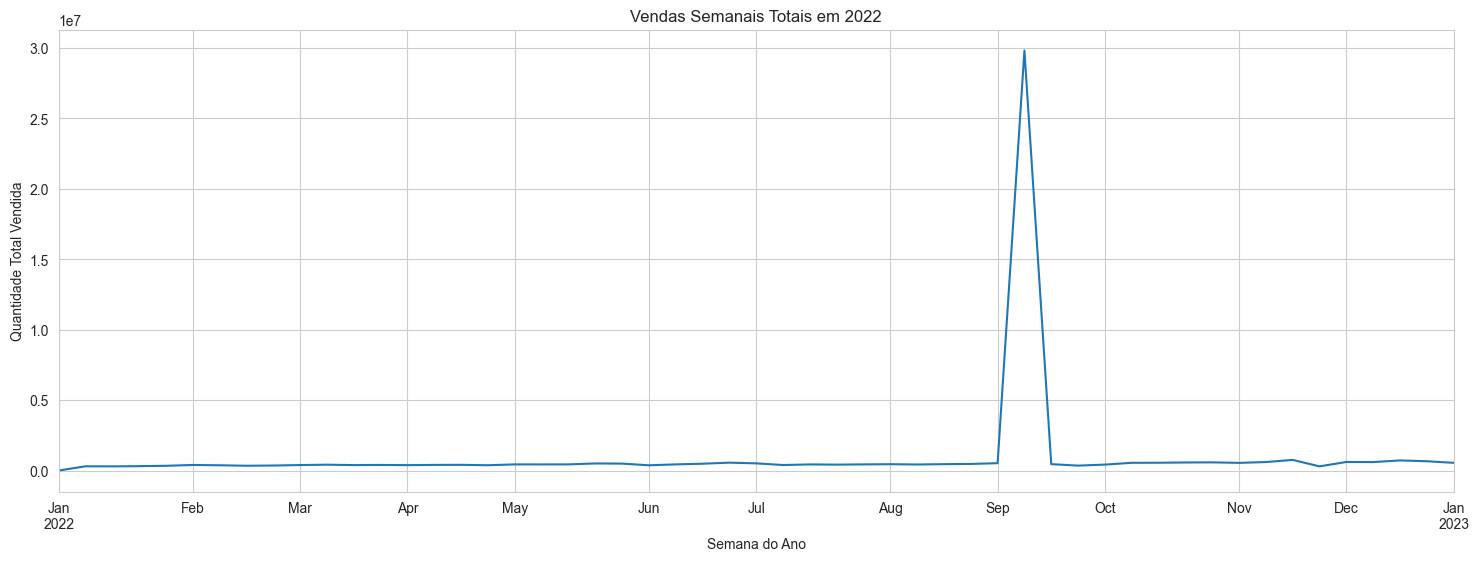

In [5]:
# Configurando o estilo e tamanho dos gráficos
plt.rcParams['figure.figsize'] = (18, 6)
sns.set_style('whitegrid')

print("Agregando as vendas totais por semana...")

# O método .resample('W') agrupa nosso índice de data por semana ('W' de Weekly) 
# e nos permite fazer uma operação, como somar (.sum()).
vendas_semanais = df_completo['quantity'].resample('W').sum()

print("Plotando o gráfico de vendas semanais...")

# Agora, simplesmente plotamos o resultado
ax = vendas_semanais.plot(title='Vendas Semanais Totais em 2022')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

In [6]:
# Encontra a data exata em que ocorreu o pico de vendas
data_do_pico = vendas_semanais.idxmax()
print(f"O pico de vendas ocorreu na semana de: {data_do_pico.date()}")

# Filtra o DataFrame completo para conter apenas os dados dessa semana específica
# Pegamos a data do pico e subtraímos 6 dias para ter a semana completa
semana_do_pico_df = df_completo[(df_completo.index >= data_do_pico - pd.Timedelta(days=6)) & (df_completo.index <= data_do_pico)]

print(f"\nAnalisando as {len(semana_do_pico_df)} transações da semana do pico...")

# Pergunta 1: Quais produtos foram os mais vendidos nessa semana?
top_produtos_pico = semana_do_pico_df.groupby('descricao')['quantity'].sum().nlargest(10)
print("\n--- Top 10 Produtos na Semana do Pico ---")
print(top_produtos_pico)

# Pergunta 2: Quais PDVs (lojas) foram os que mais venderam?
top_pdvs_pico = semana_do_pico_df.groupby('pdv')['quantity'].sum().nlargest(10)
print("\n--- Top 10 PDVs na Semana do Pico ---")
print(top_pdvs_pico)

O pico de vendas ocorreu na semana de: 2022-09-11

Analisando as 421668 transações da semana do pico...

--- Top 10 Produtos na Semana do Pico ---
descricao
SKOL PREMIUM VODKA 6/1.75L 80PF        872622.999799
FIREBALL 24/375ML PET 66PF             824693.999923
SKOL PREMIUM VODKA 24/375ML 80PF       767813.999780
FIREBALL 48/200ML PET 66PF             692375.000058
BUFFALO TRACE BOURBON 12/750ML 90PF    635408.993273
TAAKA VODKA 6/1.75L PET 80PF           556852.999882
FIREBALL 12/750ML PET 66PF             451412.000445
SKOL PREMIUM VODKA 48/200ML 80PF       436046.999854
FIREBALL 12/10/50ML 66PF               426119.999988
PAUL MASSON BRANDY VS 12/750ML 80PF    417657.000124
Name: quantity, dtype: float64

--- Top 10 PDVs na Semana do Pico ---
pdv
desconhecido           215674.664223
6491855528940268514    176202.570881
3025867614395044464    170252.533326
8723723113467008071    132026.311978
4304226119364518876    130715.999814
9171644843739559005    126486.749948
13658391462786417

Número de linhas ANTES da limpeza: 6560698
Número de linhas DEPOIS da limpeza: 6139030
Foram removidas 421668 linhas.

Plotando o gráfico com os dados limpos...


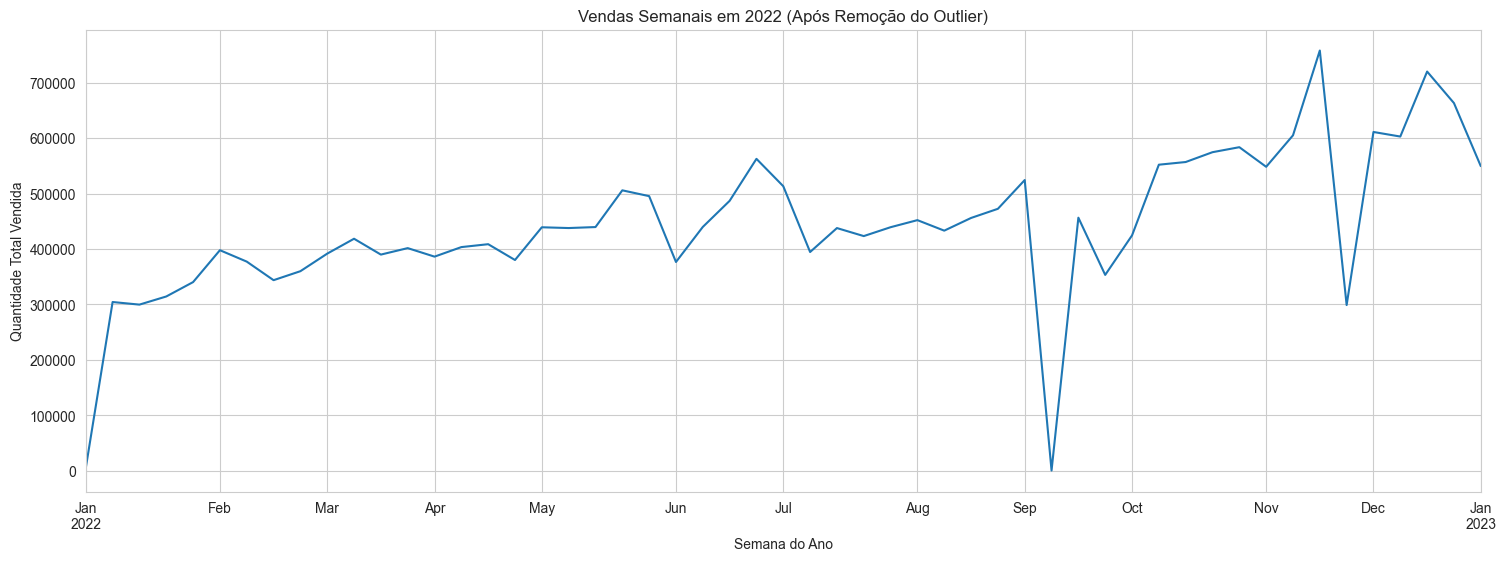

In [7]:
print(f"Número de linhas ANTES da limpeza: {len(df_completo)}")

# Encontra a data do pico de vendas
vendas_semanais_bruto = df_completo['quantity'].resample('W').sum()
data_do_pico = vendas_semanais_bruto.idxmax()

# Define o início e o fim da semana anômala
inicio_semana_anomala = data_do_pico - pd.Timedelta(days=6)
fim_semana_anomala = data_do_pico

# Filtra o DataFrame, mantendo apenas as linhas FORA da semana do pico
df_limpo = df_completo[(df_completo.index < inicio_semana_anomala) | (df_completo.index > fim_semana_anomala)].copy()

print(f"Número de linhas DEPOIS da limpeza: {len(df_limpo)}")
print(f"Foram removidas {len(df_completo) - len(df_limpo)} linhas.")

# Verificação Visual
print("\nPlotando o gráfico com os dados limpos...")
vendas_semanais_limpo = df_limpo['quantity'].resample('W').sum()

ax = vendas_semanais_limpo.plot(title='Vendas Semanais em 2022 (Após Remoção do Outlier)')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

In [8]:
display(df_limpo.head())

,internal_store_id,internal_product_id,distributor_id,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes,...,marca,fabricante,pdv,premise,categoria_pdv,zipcode,semana_do_ano,dia_da_semana,mes,dia_do_mes
transaction_date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2904283814836480430,700484830392455456,4,2022-01-01,5.0,46.250000,46.250000,11.250000,15.250000,0.000000,...,Sparkling Ice Lemon Lime,Talking Rain,2904283814836480430,Off Premise,Grocery,30114.0,52,Saturday,1,1
2022-01-01,1073673009638227380,1078622472225871166,4,2022-01-01,4.0,37.000000,37.000000,9.000000,12.200000,0.000000,...,Sparkling Ice Pink Grapefruit,Talking Rain,1073673009638227380,Off Premise,Grocery,30307.0,52,Saturday,1,1
2022-01-01,2904283814836480430,1267019189808386798,4,2022-01-01,5.0,46.250000,46.250000,11.250000,15.250000,0.000000,...,Sparkling Ice Fruit Punch,Talking Rain,2904283814836480430,Off Premise,Grocery,30114.0,52,Saturday,1,1
2022-01-01,1073673009638227380,3379576219453733902,4,2022-01-01,2.0,52.240002,46.160648,9.210649,16.799999,6.079354,...,Ritas Straw-Ber-Rita,AB Anheuser Busch Inc,1073673009638227380,Off Premise,Grocery,30307.0,52,Saturday,1,1
2022-01-01,7258564421045379389,519576013096278235,4,2022-01-01,7.0,114.379997,114.379997,27.999998,17.780001,0.000000,...,Essentia Water,Essentia Water LLC,7258564421045379389,Off Premise,Super Center,30341.0,52,Saturday,1,1


Gerando gráfico da tendência semanal (com interpolação para corrigir a visualização)...


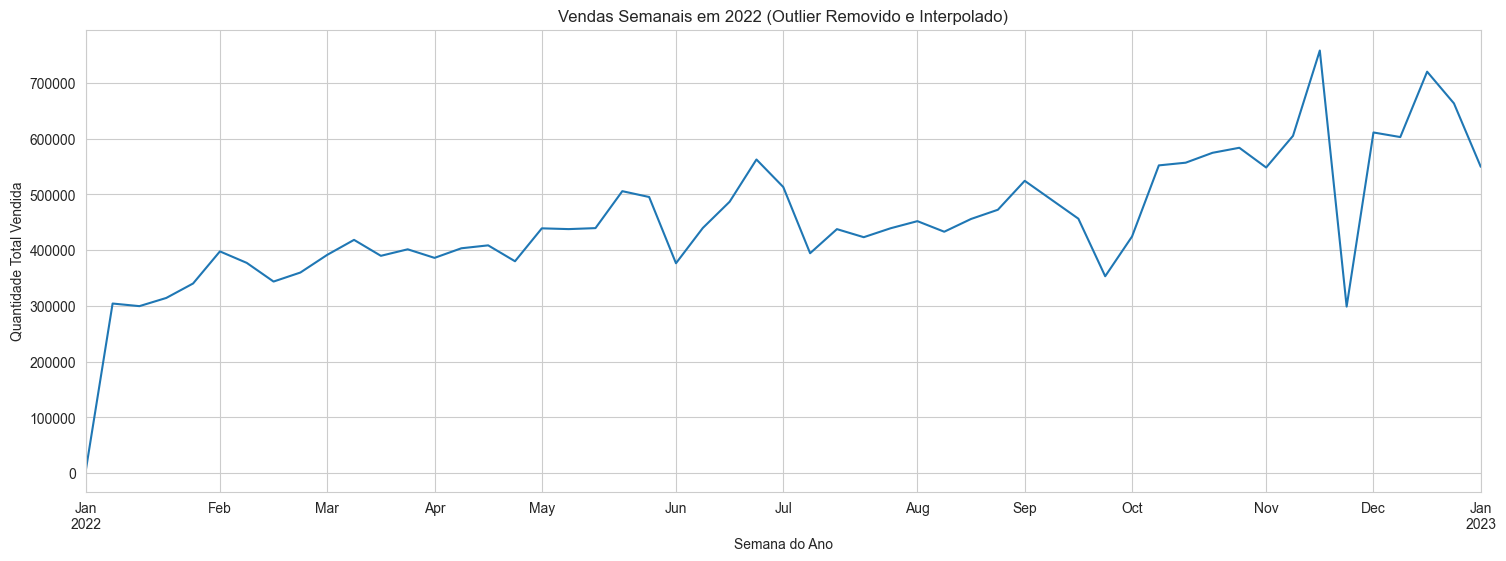

In [9]:
print("Gerando gráfico da tendência semanal (com interpolação para corrigir a visualização)...")

# 1. Agrega os dados semanais a partir do df_limpo. Isso cria a série com o "buraco" de valor zero.
vendas_semanais = df_limpo['quantity'].resample('W').sum()

# 2. Substituímos o zero (que é um artefato da nossa limpeza) por NaN, que significa "dado ausente".
vendas_semanais[vendas_semanais == 0] = np.nan

# 3. Criamos uma NOVA variável, interpolada, APENAS para o gráfico.
vendas_semanais_interpolado = vendas_semanais.interpolate(method='linear')

# 4. Plotamos a versão corrigida, que é visualmente mais honesta.
ax = vendas_semanais_interpolado.plot(title='Vendas Semanais em 2022 (Outlier Removido e Interpolado)')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

--- Análise por Categoria de Produto ---


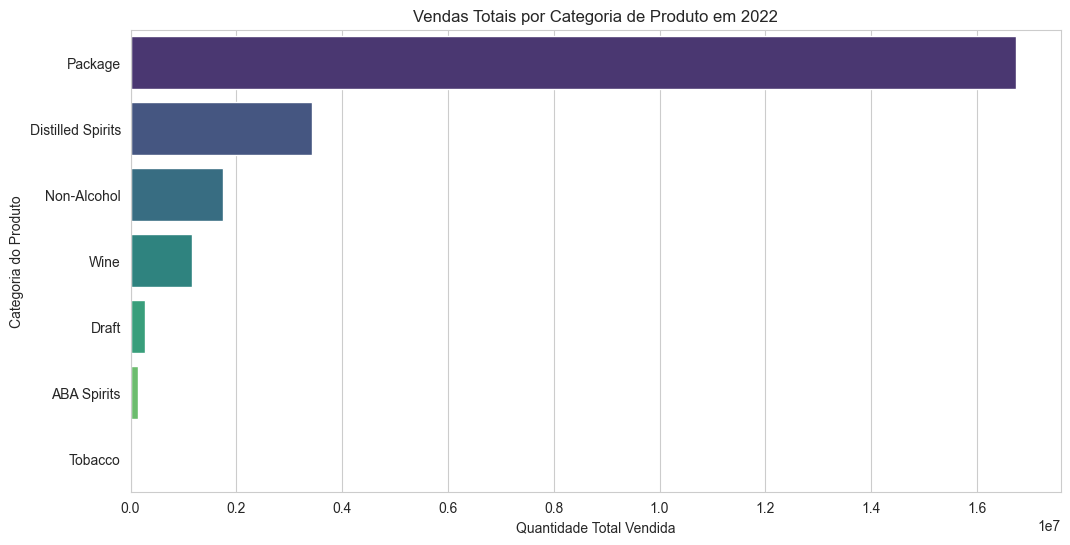


 categoria
Package              1.674114e+07
Distilled Spirits    3.433854e+06
Non-Alcohol          1.749702e+06
Wine                 1.153225e+06
Draft                2.751432e+05
Name: quantity, dtype: float64


--- Análise por Categoria de Ponto de Venda (PDV) ---


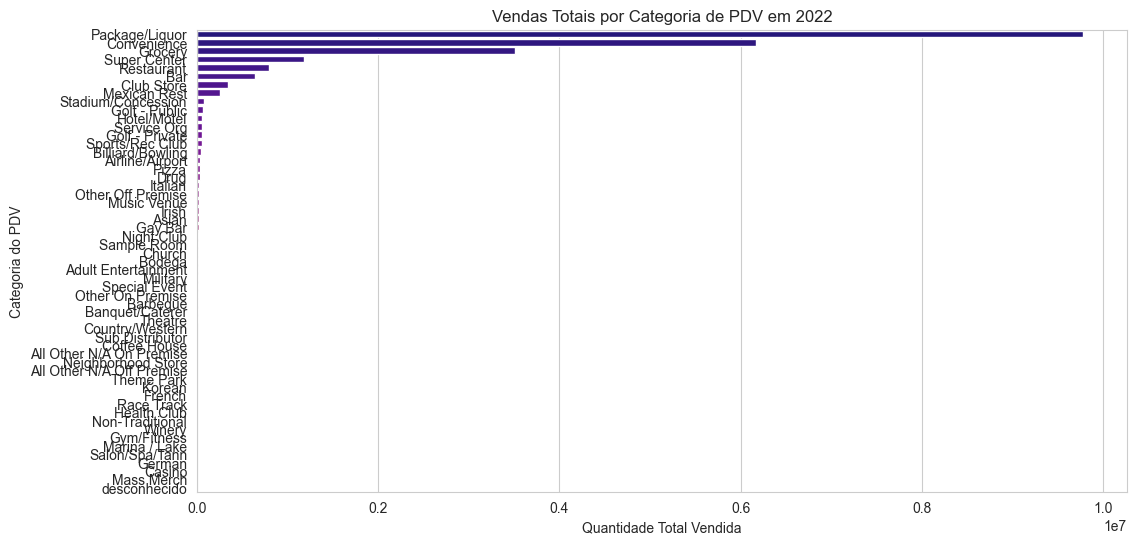


 categoria_pdv
Package/Liquor    9.773180e+06
Convenience       6.167953e+06
Grocery           3.514660e+06
Super Center      1.186345e+06
Restaurant        7.934764e+05
Name: quantity, dtype: float64


In [10]:
# Ignora os avisos futuros do pandas para um output mais limpo
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- Análise por Categoria de Produto ---
print("--- Análise por Categoria de Produto ---")
vendas_por_categoria_produto = df_limpo.groupby('categoria')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_categoria_produto.values, y=vendas_por_categoria_produto.index, palette='viridis')
plt.title('Vendas Totais por Categoria de Produto em 2022')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Categoria do Produto')
plt.show()

print("\n", vendas_por_categoria_produto.head(5))


# --- Análise por Categoria de PDV ---
print("\n\n--- Análise por Categoria de Ponto de Venda (PDV) ---")
vendas_por_categoria_pdv = df_limpo.groupby('categoria_pdv')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_categoria_pdv.values, y=vendas_por_categoria_pdv.index, palette='plasma')
plt.title('Vendas Totais por Categoria de PDV em 2022')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Categoria do PDV')
plt.show()

print("\n", vendas_por_categoria_pdv.head(5))

In [11]:
print("--- Uso de memória ANTES da otimização ---")
df_limpo.info(memory_usage='deep')

# Colunas de texto com poucos valores repetidos são candidatas a otimização
colunas_para_otimizar = ['categoria', 'marca', 'fabricante', 'categoria_pdv', 'premise']

for coluna in colunas_para_otimizar:
    # Apenas se a coluna existir no dataframe
    if coluna in df_limpo.columns:
        df_limpo[coluna] = df_limpo[coluna].astype('category')

print("\n--- Uso de memória DEPOIS da otimização ---")
df_limpo.info(memory_usage='deep')

--- Uso de memória ANTES da otimização ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6139030 entries, 2022-01-01 to 2022-12-31
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   internal_store_id    object 
 1   internal_product_id  object 
 2   distributor_id       object 
 3   reference_date       object 
 4   quantity             float64
 5   gross_value          float64
 6   net_value            float64
 7   gross_profit         float64
 8   discount             float64
 9   taxes                float64
 10  produto              object 
 11  categoria            object 
 12  descricao            object 
 13  tipos                object 
 14  label                object 
 15  subcategoria         object 
 16  marca                object 
 17  fabricante           object 
 18  pdv                  object 
 19  premise              object 
 20  categoria_pdv        object 
 21  zipcode              float64
 22  semana_d

In [12]:
# --- CÉLULA: ENGENHARIA DE FEATURES (CATEGORIAS) ---

# Trava de segurança para garantir que a célula anterior foi executada
if 'df_limpo' in locals():
    print("DataFrame 'df_limpo' encontrado. Criando features de categoria...")

    # Cria uma coluna binária (1 para 'Package', 0 para as outras)
    df_limpo['is_package_category'] = (df_limpo['categoria'] == 'Package').astype(int)

    # Cria uma coluna binária para a categoria de PDV dominante
    df_limpo['is_package_liquor_pdv'] = (df_limpo['categoria_pdv'] == 'Package/Liquor').astype(int)

    # Cria uma feature de interação: é 1 se AMBAS as condições acima forem verdadeiras.
    df_limpo['is_package_in_package_liquor'] = df_limpo['is_package_category'] * df_limpo['is_package_liquor_pdv']

    print("✅ Sucesso! Features de categoria adicionadas ao 'df_limpo'.")
    
    # Mostra uma amostra aleatória das novas colunas para verificação
    colunas_para_verificar = [
        'categoria', 
        'is_package_category', 
        'categoria_pdv', 
        'is_package_liquor_pdv', 
        'is_package_in_package_liquor'
    ]
    display(df_limpo[colunas_para_verificar].sample(5))

else:
    print("❌ ERRO: DataFrame 'df_limpo' não encontrado. Por favor, rode a célula de limpeza de dados primeiro.")

DataFrame 'df_limpo' encontrado. Criando features de categoria...
✅ Sucesso! Features de categoria adicionadas ao 'df_limpo'.


,categoria,is_package_category,categoria_pdv,is_package_liquor_pdv,is_package_in_package_liquor
transaction_date,,,,,
2022-11-16,Non-Alcohol,0,Convenience,0,0
2022-05-13,Package,1,Grocery,0,0
2022-05-19,Package,1,Convenience,0,0
2022-11-23,Non-Alcohol,0,Grocery,0,0
2022-09-29,Package,1,Grocery,0,0


In [13]:
if 'df_limpo' not in locals() or 'is_package_category' not in df_limpo.columns:
    print("ERRO: Rode as células anteriores de limpeza e criação de features de categoria primeiro.")
else:
    print("Iniciando a criação da base de modelagem final...")

    # --- PARTE 1: Base semanal com features de tempo (Lags e Janelas Móveis) ---
    
    # Agrega as vendas para uma frequência semanal por produto/pdv
    df_semanal = df_limpo.reset_index().groupby([
        'semana_do_ano', 
        'pdv', 
        'produto'
    ]).agg(
        quantity_total=('quantity', 'sum')
    ).reset_index()

    # Ordena os dados para calcular lags e janelas móveis corretamente
    df_semanal.sort_values(by=['pdv', 'produto', 'semana_do_ano'], inplace=True)
    
    # Cria as features de Lag e Janela Móvel
    df_semanal['lag_1_semana'] = df_semanal.groupby(['pdv', 'produto'])['quantity_total'].shift(1)
    df_semanal['media_movel_4_semanas'] = df_semanal.groupby(['pdv', 'produto'])['quantity_total'].transform(
        lambda x: x.rolling(4, min_periods=1).mean().shift(1) # Usamos shift(1) para não usar a informação da própria semana
    )
    
    # Preenche os NaNs criados pelos lags/janelas (primeiras semanas de cada produto)
    df_semanal.fillna(0, inplace=True)
    print("Base semanal com features de tempo criada.")

    # --- PARTE 2: Trazendo de volta as Features de Categoria ---

    # Cria uma "tabela de identidade" para os produtos, sem duplicatas
    features_produto = df_limpo[['produto', 'categoria', 'marca', 'is_package_category']].drop_duplicates(subset=['produto'])
    
    # Cria uma "tabela de identidade" para os PDVs, sem duplicatas
    features_pdv = df_limpo[['pdv', 'categoria_pdv', 'zipcode', 'is_package_liquor_pdv']].drop_duplicates(subset=['pdv'])
    
    print("Tabelas de características de Produtos e PDVs criadas.")

    # Passo 3: Une (merge) as características de volta na base semanal
    print("Juntando features de produto...")
    df_modelo = pd.merge(df_semanal, features_produto, on='produto', how='left')

    print("Juntando features de PDV...")
    df_modelo = pd.merge(df_modelo, features_pdv, on='pdv', how='left')

    print("\n✅ SUCESSO! Base de modelagem final ('df_modelo') criada com todas as features.")
    
    print("\n--- Amostra do DataFrame final ---")
    display(df_modelo.head())
    
    print("\n--- Verificação final de nulos ---")
    # Verificamos se os merges criaram algum nulo inesperado
    print(df_modelo.isnull().sum())

Iniciando a criação da base de modelagem final...
Base semanal com features de tempo criada.
Tabelas de características de Produtos e PDVs criadas.
Juntando features de produto...
Juntando features de PDV...

✅ SUCESSO! Base de modelagem final ('df_modelo') criada com todas as features.

--- Amostra do DataFrame final ---


,semana_do_ano,pdv,produto,quantity_total,lag_1_semana,media_movel_4_semanas,categoria,marca,is_package_category,categoria_pdv,zipcode,is_package_liquor_pdv
0,6,1000237487041964405,1837429607327399565,1.0,0.0,0.000000,Package,Fire Maker Perfect Match IPA,1,Winery,30175.0,0
1,7,1000237487041964405,1837429607327399565,2.0,1.0,1.000000,Package,Fire Maker Perfect Match IPA,1,Winery,30175.0,0
2,21,1000237487041964405,1837429607327399565,1.0,2.0,1.500000,Package,Fire Maker Perfect Match IPA,1,Winery,30175.0,0
3,25,1000237487041964405,1837429607327399565,2.0,1.0,1.333333,Package,Fire Maker Perfect Match IPA,1,Winery,30175.0,0
4,28,1000237487041964405,1837429607327399565,2.0,2.0,1.500000,Package,Fire Maker Perfect Match IPA,1,Winery,30175.0,0



--- Verificação final de nulos ---
semana_do_ano            0
pdv                      0
produto                  0
quantity_total           0
lag_1_semana             0
media_movel_4_semanas    0
categoria                0
marca                    0
is_package_category      0
categoria_pdv            0
zipcode                  0
is_package_liquor_pdv    0
dtype: int64


**Modelagem Preditiva**

Nesta seção, vamos preparar o dataset final para a modelagem, dividindo-o em conjuntos de treino e validação. Em seguida, treinaremos nosso primeiro modelo LightGBM para prever a quantidade de vendas.

**Modelo v1***

In [14]:
from sklearn.model_selection import train_test_split

print("Iniciando a fase de preparação para o treinamento do modelo...")

# --- Passo 1: Separar as 'pistas' (Features, X) da 'resposta' (Alvo, y) ---

# Nosso alvo é a quantidade total que queremos prever.
y = df_modelo['quantity_total']

# Nossas features são todas as outras colunas que podem ajudar na previsão.
# Removemos as colunas de ID que não são numéricas e a própria coluna alvo.
X = df_modelo.drop(columns=['quantity_total', 'produto', 'pdv'])

print(f"Dataset preparado com {X.shape[1]} features.")


# --- Passo 2: Dividir os dados em Treino e Validação (CRUCIAL!) ---
# Não podemos embaralhar os dados, pois é uma série temporal. O futuro deve ser usado para teste.
# Vamos treinar com os dados até a semana 47 e validar nas semanas 48 em diante.

semana_de_corte = 47
treino_indices = df_modelo[df_modelo['semana_do_ano'] <= semana_de_corte].index
validacao_indices = df_modelo[df_modelo['semana_do_ano'] > semana_de_corte].index

X_treino, X_validacao = X.loc[treino_indices], X.loc[validacao_indices]
y_treino, y_validacao = y.loc[treino_indices], y.loc[validacao_indices]

print(f"Dados divididos em {len(X_treino)} linhas para treino e {len(X_validacao)} para validação.")


# --- Passo 3: Treinar o Modelo LightGBM! ---
print("\nIniciando o treinamento do modelo LightGBM...")

# Usamos o objective='regression_l1' (MAE)
# pois é um ótimo 'proxy' para a métrica do desafio, o WMAPE.
lgbm = lgb.LGBMRegressor(objective='regression_l1', random_state=42)

# O comando .fit() é o que de fato treina o modelo.
lgbm.fit(X_treino, y_treino)

print("\n✅ SUCESSO! Modelo treinado e pronto na variável 'lgbm'.")

Iniciando a fase de preparação para o treinamento do modelo...
Dataset preparado com 9 features.
Dados divididos em 5204042 linhas para treino e 614688 para validação.

Iniciando o treinamento do modelo LightGBM...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 5204042, number of used features: 9
[LightGBM] [Info] Start training from score 2.000000

✅ SUCESSO! Modelo treinado e pronto na variável 'lgbm'.


In [15]:
print("Iniciando previsões no conjunto de validação...")
previsoes_validacao = lgbm.predict(X_validacao)

# O modelo pode prever valores negativos, o que não faz sentido para vendas.
# Vamos garantir que todas as previsões sejam no mínimo zero.
previsoes_validacao[previsoes_validacao < 0] = 0

print("✅ Previsões realizadas com sucesso!")
print("\nExemplos de valores reais vs. previstos:")
print(f"Valores Reais: {y_validacao.values[:5]}")
print(f"Valores Previstos: {previsoes_validacao[:5].round(2)}")

def wmape(y_real, y_previsto):
    """
    Calcula o Weighted Mean Absolute Percentage Error (WMAPE)
    """
    # Garante que não haverá divisão por zero se a soma total for 0
    soma_real = np.sum(y_real)
    if soma_real == 0:
        return 0
    
    erro_absoluto = np.sum(np.abs(y_real - y_previsto))
    wmape_score = erro_absoluto / soma_real
    return wmape_score

# Calcula o WMAPE no nosso conjunto de validação
nosso_wmape = wmape(y_validacao, previsoes_validacao)

print(f"\nNosso WMAPE no conjunto de validação é: {nosso_wmape:.4f}")
print(f"Isso equivale a um erro percentual de: {nosso_wmape:.2%}")

Iniciando previsões no conjunto de validação...
✅ Previsões realizadas com sucesso!

Exemplos de valores reais vs. previstos:
Valores Reais: [1. 1. 2. 2. 2.]
Valores Previstos: [1. 1. 1. 1. 1.]

Nosso WMAPE no conjunto de validação é: 0.4800
Isso equivale a um erro percentual de: 48.00%


Calculando e plotando a importância das features...


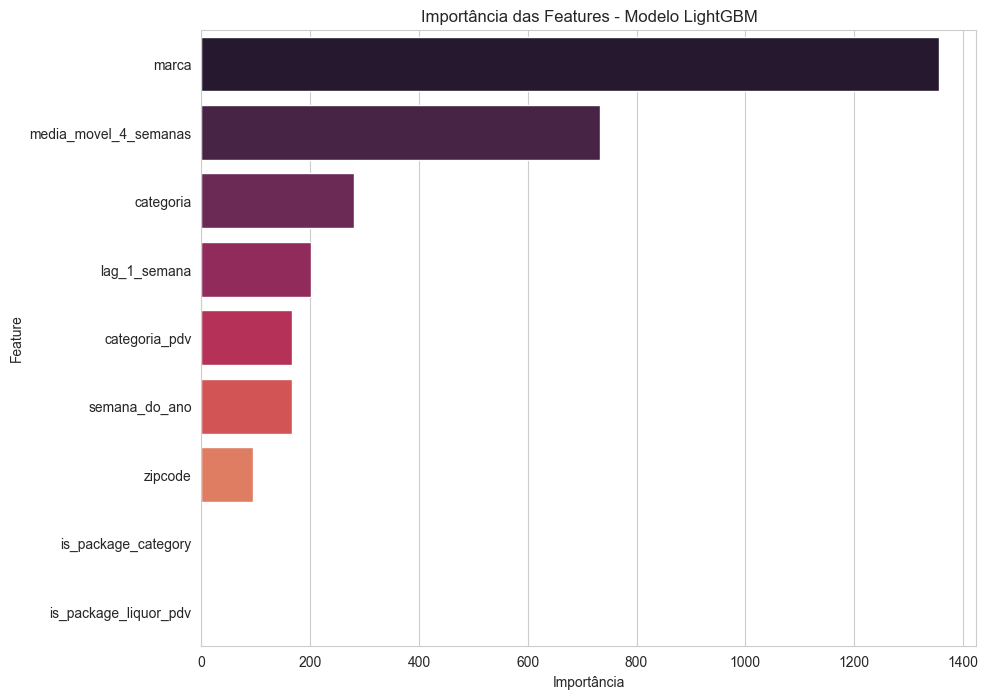


--- Top 5 Features Mais Importantes ---
                 feature  importance
4                  marca        1357
2  media_movel_4_semanas         733
3              categoria         280
1           lag_1_semana         202
6          categoria_pdv         167


In [16]:
print("Calculando e plotando a importância das features...")

# Cria um DataFrame com a importância de cada feature
feature_importances = pd.DataFrame({
    'feature': X_treino.columns,
    'importance': lgbm.feature_importances_,
}).sort_values('importance', ascending=False)

# Plota o gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='rocket')
plt.title('Importância das Features - Modelo LightGBM')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

print("\n--- Top 5 Features Mais Importantes ---")
print(feature_importances.head(5))

In [17]:
print("Iniciando a criação de features de interação (Marca + Semana)...")

# Cria uma feature temporária combinando marca e semana
df_modelo['marca_semana'] = df_modelo['marca'].astype(str) + '_semana_' + df_modelo['semana_do_ano'].astype(str)

# Calcula a média de vendas para cada combinação 'marca_semana'
# Usamos .transform('mean') para mapear essa média de volta para cada linha do dataframe original
media_vendas_marca_semana = df_modelo.groupby('marca_semana')['quantity_total'].transform('mean')

# Criamos nossa nova feature poderosa!
df_modelo['feature_media_vendas_marca_semana'] = media_vendas_marca_semana

# Podemos remover a coluna temporária
df_modelo.drop(columns=['marca_semana'], inplace=True)

print("✅ Sucesso! Nova feature 'media_vendas_marca_semana' criada.")
display(df_modelo[['marca', 'semana_do_ano', 'quantity_total', 'feature_media_vendas_marca_semana']].head())

Iniciando a criação de features de interação (Marca + Semana)...
✅ Sucesso! Nova feature 'media_vendas_marca_semana' criada.


,marca,semana_do_ano,quantity_total,feature_media_vendas_marca_semana
0,Fire Maker Perfect Match IPA,6,1.0,1.142857
1,Fire Maker Perfect Match IPA,7,2.0,1.090909
2,Fire Maker Perfect Match IPA,21,1.0,0.968750
3,Fire Maker Perfect Match IPA,25,2.0,1.166667
4,Fire Maker Perfect Match IPA,28,2.0,0.933333


**Modelo v2**

In [18]:
print("Iniciando o RETREINAMENTO do modelo com a nova feature...")

# --- Passo 1: Separar X e y (agora X contém a nova feature) ---
y = df_modelo['quantity_total']
X = df_modelo.drop(columns=['quantity_total', 'produto', 'pdv'])

# Garante que colunas de texto sejam do tipo 'category'
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

print(f"Dataset preparado com {X.shape[1]} features (uma a mais que antes).")

# --- Passo 2: Dividir em Treino e Validação ---
semana_de_corte = 47
treino_indices = df_modelo[df_modelo['semana_do_ano'] <= semana_de_corte].index
validacao_indices = df_modelo[df_modelo['semana_do_ano'] > semana_de_corte].index

X_treino, X_validacao = X.loc[treino_indices], X.loc[validacao_indices]
y_treino, y_validacao = y.loc[treino_indices], y.loc[validacao_indices]

# --- Passo 3: Retreinar o Modelo LightGBM ---
print("\nIniciando o treinamento do novo modelo...")
lgbm_v2 = lgb.LGBMRegressor(objective='regression_l1', random_state=42)
lgbm_v2.fit(X_treino, y_treino)

print("\n✅ SUCESSO! Modelo v2 treinado e pronto na variável 'lgbm_v2'.")

# --- Passo 4: Reavaliar o WMAPE ---
print("\nIniciando previsões com o novo modelo...")
previsoes_v2 = lgbm_v2.predict(X_validacao)
previsoes_v2[previsoes_v2 < 0] = 0

def wmape(y_real, y_previsto):
    soma_real = np.sum(y_real)
    if soma_real == 0: return 0
    return np.sum(np.abs(y_real - y_previsto)) / soma_real

novo_wmape = wmape(y_validacao, previsoes_v2)

print("\n-------------------------------------------")
print(f"O WMAPE do modelo anterior era: 48.00%")
print(f"O NOVO WMAPE com a feature de marca é: {novo_wmape:.2%}")
print("-------------------------------------------")

Iniciando o RETREINAMENTO do modelo com a nova feature...
Dataset preparado com 10 features (uma a mais que antes).

Iniciando o treinamento do novo modelo...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 5204042, number of used features: 10
[LightGBM] [Info] Start training from score 2.000000

✅ SUCESSO! Modelo v2 treinado e pronto na variável 'lgbm_v2'.

Iniciando previsões com o novo modelo...

-------------------------------------------
O WMAPE do modelo anterior era: 48.00%
O NOVO WMAPE 

Analisando a importância das features do Modelo v2...


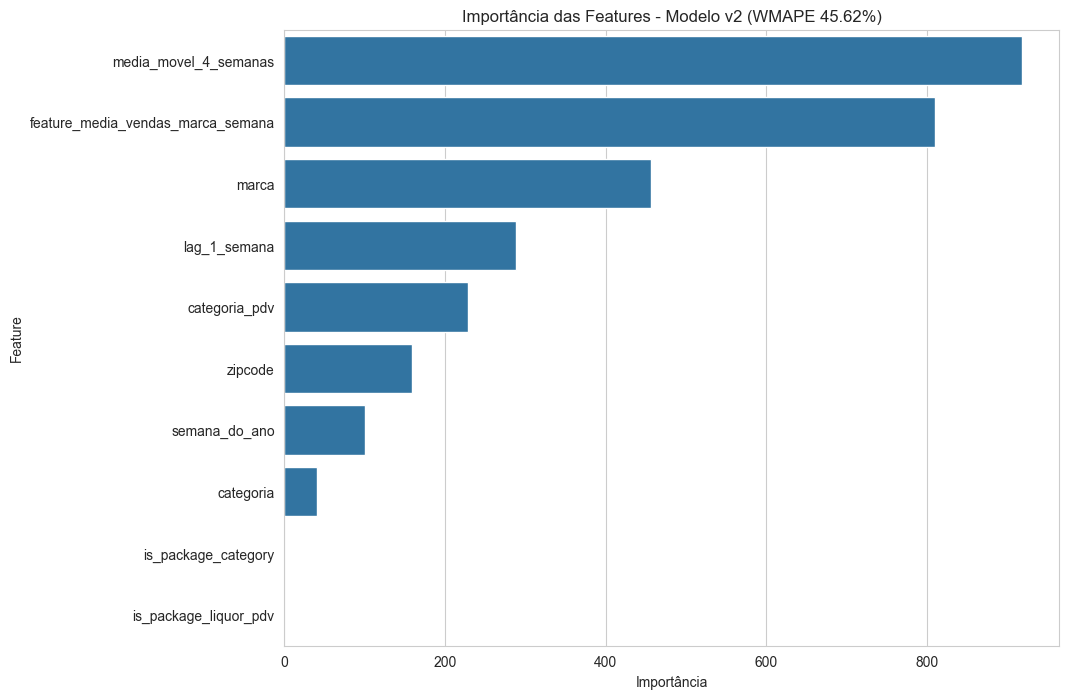

In [19]:
print("Analisando a importância das features do Modelo v2...")

# Cria um DataFrame com a importância de cada feature do novo modelo
feature_importances_v2 = pd.DataFrame({
    'feature': X_treino.columns,
    'importance': lgbm_v2.feature_importances_,
}).sort_values('importance', ascending=False)

# Plota o gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_v2)
plt.title('Importância das Features - Modelo v2 (WMAPE 45.62%)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

Engenharia Avançada de Features de Tempo

In [20]:
if 'df_modelo' in locals():
    print("Iniciando a criação de features de tempo avançadas...")

    # Usamos o groupby para calcular as features para cada produto em cada loja individualmente
    grouped = df_modelo.groupby(['pdv', 'produto'])['quantity_total']

    # --- Lags Adicionais ---
    # Adicionamos lags de 3 e 4 semanas para dar uma visão de um passado um pouco mais distante
    df_modelo['lag_3_semanas'] = grouped.shift(3).fillna(0)
    df_modelo['lag_4_semanas'] = grouped.shift(4).fillna(0)

    # --- Janelas Móveis Adicionais ---
    # A média móvel de 2 semanas captura tendências de curtíssimo prazo
    df_modelo['media_movel_2_semanas'] = grouped.transform(lambda x: x.rolling(2, min_periods=1).mean().shift(1)).fillna(0)
    
    # O desvio padrão móvel captura a VOLATILIDADE das vendas recentes. 
    # É uma feature muito poderosa!
    df_modelo['std_movel_4_semanas'] = grouped.transform(lambda x: x.rolling(4, min_periods=1).std().shift(1)).fillna(0)

    print("✅ Sucesso! 4 novas features de tempo criadas.")
    
    colunas_novas = ['lag_3_semanas', 'lag_4_semanas', 'media_movel_2_semanas', 'std_movel_4_semanas']
    display(df_modelo[colunas_novas].head())
else:
    print("❌ ERRO: DataFrame 'df_modelo' não encontrado.")

Iniciando a criação de features de tempo avançadas...
✅ Sucesso! 4 novas features de tempo criadas.


,lag_3_semanas,lag_4_semanas,media_movel_2_semanas,std_movel_4_semanas
0,0.0,0.0,0.0,0.000000
1,0.0,0.0,1.0,0.000000
2,0.0,0.0,1.5,0.707107
3,1.0,0.0,1.5,0.577350
4,2.0,1.0,1.5,0.577350


**Modelo v3**

In [21]:
print("Iniciando o RETREINAMENTO do modelo com as features de tempo avançadas...")

# --- Preparação com o DataFrame atualizado (14 features) ---
y = df_modelo['quantity_total']
X = df_modelo.drop(columns=['quantity_total', 'produto', 'pdv'])

# Garante que colunas de texto sejam do tipo 'category'
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

print(f"Dataset preparado com {X.shape[1]} features.")

# --- Divisão em Treino e Validação ---
semana_de_corte = 47
treino_indices = df_modelo[df_modelo['semana_do_ano'] <= semana_de_corte].index
validacao_indices = df_modelo[df_modelo['semana_do_ano'] > semana_de_corte].index

X_treino, X_validacao = X.loc[treino_indices], X.loc[validacao_indices]
y_treino, y_validacao = y.loc[treino_indices], y.loc[validacao_indices]

# --- Treinar o Modelo v3 ---
print("\nIniciando o treinamento do novo modelo (v3)...")
lgbm_v3 = lgb.LGBMRegressor(objective='regression_l1', random_state=42)
lgbm_v3.fit(X_treino, y_treino)

print("\n✅ SUCESSO! Modelo v3 treinado e pronto na variável 'lgbm_v3'.")

# --- Reavaliar o WMAPE ---
print("\nIniciando previsões com o modelo v3...")
previsoes_v3 = lgbm_v3.predict(X_validacao)
previsoes_v3[previsoes_v3 < 0] = 0

def wmape(y_real, y_previsto):
    soma_real = np.sum(y_real)
    if soma_real == 0: return 0
    return np.sum(np.abs(y_real - y_previsto)) / soma_real

novo_wmape_v3 = wmape(y_validacao, previsoes_v3)

print("\n-------------------------------------------")
print(f"O WMAPE do modelo anterior (v2) era: 45.62%")
print(f"O NOVO WMAPE (v3) com mais features de tempo é: {novo_wmape_v3:.2%}")
print("-------------------------------------------")

Iniciando o RETREINAMENTO do modelo com as features de tempo avançadas...
Dataset preparado com 14 features.

Iniciando o treinamento do novo modelo (v3)...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3078
[LightGBM] [Info] Number of data points in the train set: 5204042, number of used features: 14
[LightGBM] [Info] Start training from score 2.000000

✅ SUCESSO! Modelo v3 treinado e pronto na variável 'lgbm_v3'.

Iniciando previsões com o modelo v3...

-------------------------------------------
O WMAPE do modelo anterior (v2) era: 45.62%
O NOVO WMAPE

**Modelo v4**

In [22]:
print("Iniciando o retreinamento do modelo com REGULARIZAÇÃO...")

# --- Treinar o Modelo v4 ---
print("\nIniciando o treinamento do novo modelo (v4)...")

lgbm_v4 = lgb.LGBMRegressor(
    objective='regression_l1', 
    random_state=42,
    # --- PARÂMETROS DE REGULARIZAÇÃO ---
    num_leaves=20,          # Reduzimos o padrão de 31 para 20
    learning_rate=0.05,     # Reduzimos a velocidade de aprendizado pela metade
    n_estimators=200        # Aumentamos o número de árvores para compensar o aprendizado mais lento
)

# O X_treino e y_treino são os mesmos de antes, com 14 features
lgbm_v4.fit(X_treino, y_treino)

print("\n✅ SUCESSO! Modelo v4 treinado e pronto.")

# --- Reavaliar o WMAPE ---
print("\nIniciando previsões com o modelo v4...")
previsoes_v4 = lgbm_v4.predict(X_validacao)
previsoes_v4[previsoes_v4 < 0] = 0

def wmape(y_real, y_previsto):
    soma_real = np.sum(y_real)
    if soma_real == 0: return 0
    return np.sum(np.abs(y_real - y_previsto)) / soma_real

novo_wmape_v4 = wmape(y_validacao, previsoes_v4)

print("\n-------------------------------------------")
print(f"O WMAPE do modelo anterior (v3) era: 46.28%")
print(f"O NOVO WMAPE (v4) com regularização é: {novo_wmape_v4:.2%}")
print("-------------------------------------------")

Iniciando o retreinamento do modelo com REGULARIZAÇÃO...

Iniciando o treinamento do novo modelo (v4)...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3078
[LightGBM] [Info] Number of data points in the train set: 5204042, number of used features: 14
[LightGBM] [Info] Start training from score 2.000000

✅ SUCESSO! Modelo v4 treinado e pronto.

Iniciando previsões com o modelo v4...

-------------------------------------------
O WMAPE do modelo anterior (v3) era: 46.28%
O NOVO WMAPE (v4) com regularização é: 46.44%
----------------------------------------

**Criação da primeira submissão**

In [23]:
# Ignora os avisos futuros do pandas para um output mais limpo
warnings.simplefilter(action='ignore', category=FutureWarning)

print("INICIANDO PROCESSO COMPLETO DE SUBMISSÃO...")

try:
    if 'df_completo' not in locals():
        raise NameError("ERRO: DataFrame 'df_completo' não encontrado. Por favor, execute a célula de carregamento de dados primeiro.")

    # ======================================================================
    # ETAPA 1: LIMPEZA E ENGENHARIA DE FEATURES
    # ======================================================================
    print("\nEtapa 1: Limpeza e Engenharia de Features...")
    
    # Limpeza do Outlier
    vendas_semanais_bruto = df_completo['quantity'].resample('W').sum()
    data_do_pico = vendas_semanais_bruto.idxmax()
    inicio_semana_anomala = data_do_pico - pd.Timedelta(days=6)
    fim_semana_anomala = data_do_pico
    df_limpo = df_completo[(df_completo.index < inicio_semana_anomala) | (df_completo.index > fim_semana_anomala)].copy()

    # Engenharia de Features
    df_semanal = df_limpo.reset_index().groupby(['semana_do_ano', 'pdv', 'produto']).agg(quantity_total=('quantity', 'sum')).reset_index()
    df_semanal.sort_values(by=['pdv', 'produto', 'semana_do_ano'], inplace=True)
    grouped = df_semanal.groupby(['pdv', 'produto'])['quantity_total']
    df_semanal['lag_1_semana'] = grouped.shift(1)
    df_semanal['media_movel_4_semanas'] = grouped.transform(lambda x: x.rolling(4, min_periods=1).mean().shift(1))
    
    features_produto = df_limpo[['produto', 'categoria', 'marca']].drop_duplicates(subset=['produto'])
    features_pdv = df_limpo[['pdv', 'categoria_pdv', 'zipcode']].drop_duplicates(subset=['pdv'])
    
    df_modelo = pd.merge(df_semanal, features_produto, on='produto', how='left')
    df_modelo = pd.merge(df_modelo, features_pdv, on='pdv', how='left')
    
    for col in df_modelo.columns:
        if pd.api.types.is_numeric_dtype(df_modelo[col]):
            df_modelo[col].fillna(0, inplace=True)
        else:
            df_modelo[col].fillna('desconhecido', inplace=True)
            
    print("Etapa 1 concluída.")

    # ======================================================================
    # ETAPA 2: TREINAR O MODELO
    # ======================================================================
    print("\nEtapa 2: Treinando o modelo final...")
    y_treino_final = df_modelo['quantity_total']
    X_treino_final = df_modelo.drop(columns=['quantity_total', 'produto', 'pdv'])
    
    for col in X_treino_final.select_dtypes(include=['object']).columns:
        X_treino_final[col] = X_treino_final[col].astype('category')

    modelo_final = lgb.LGBMRegressor(objective='regression_l1', random_state=42)
    modelo_final.fit(X_treino_final, y_treino_final)
    print("Modelo final treinado.")

    # ======================================================================
    # ETAPA 3: PREPARAÇÃO DO DATAFRAME DE SUBMISSÃO
    # ======================================================================
    print("\nEtapa 3: Criando e tratando o DataFrame de previsão...")
    combinacoes_unicas = df_modelo[['pdv', 'produto']].drop_duplicates()
    semanas_previsao = pd.DataFrame({'semana_do_ano': [1, 2, 3, 4, 5]})
    df_previsao = combinacoes_unicas.merge(semanas_previsao, how='cross')

    last_week_data = df_modelo[df_modelo['semana_do_ano'] == 52]
    df_previsao = pd.merge(df_previsao, last_week_data[['pdv', 'produto', 'quantity_total', 'media_movel_4_semanas']], on=['pdv', 'produto'], how='left')
    df_previsao.rename(columns={'quantity_total': 'lag_1_semana'}, inplace=True)
    
    df_previsao = pd.merge(df_previsao, features_produto, on='produto', how='left')
    df_previsao = pd.merge(df_previsao, features_pdv, on='pdv', how='left')
    
    for col in df_previsao.columns:
        if pd.api.types.is_numeric_dtype(df_previsao[col]):
            df_previsao[col].fillna(0, inplace=True)
        else:
            df_previsao[col].fillna('desconhecido', inplace=True)
            
    print("DataFrame de previsão pronto.")

    # ======================================================================
    # ETAPA 4: PREVISÃO FINAL E GERAÇÃO DO ARQUIVO
    # ======================================================================
    print("\nEtapa 4: Realizando a previsão final...")
    X_previsao = df_previsao[X_treino_final.columns]
    for col in X_previsao.select_dtypes(include=['object']).columns:
        X_previsao[col] = X_previsao[col].astype('category')

    previsoes_finais = modelo_final.predict(X_previsao)
    previsoes_finais[previsoes_finais < 0] = 0

    df_submissao = pd.DataFrame({
        'semana': df_previsao['semana_do_ano'],
        'pdv': df_previsao['pdv'],
        'produto': df_previsao['produto'],
        'quantidade': previsoes_finais.round().astype(int)
    })

    nome_do_arquivo = 'submissao_final.parquet'
    df_submissao.to_parquet(nome_do_arquivo, index=False)

    print(f"\n✅✅✅ SUCESSO! Arquivo '{nome_do_arquivo}' criado e pronto para submissão. ✅✅✅")
    display(df_submissao.head())

except Exception as e:
    print(f"⚠️ Ocorreu um erro: {e}")

INICIANDO PROCESSO COMPLETO DE SUBMISSÃO...

Etapa 1: Limpeza e Engenharia de Features...
Etapa 1 concluída.

Etapa 2: Treinando o modelo final...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2057
[LightGBM] [Info] Number of data points in the train set: 5818730, number of used features: 7
[LightGBM] [Info] Start training from score 2.000000
Modelo final treinado.

Etapa 3: Criando e tratando o DataFrame de previsão...
DataFrame de previsão pronto.

Etapa 4: Realizando a previsão final...


C:\Users\gugut\AppData\Local\Temp\ipykernel_31288\3340003202.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_previsao[col] = X_previsao[col].astype('category')
C:\Users\gugut\AppData\Local\Temp\ipykernel_31288\3340003202.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_previsao[col] = X_previsao[col].astype('category')
C:\Users\gugut\AppData\Local\Temp\ipykernel_31288\3340003202.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row


✅✅✅ SUCESSO! Arquivo 'submissao_final.parquet' criado e pronto para submissão. ✅✅✅


,semana,pdv,produto,quantidade
0,1,1000237487041964405,1837429607327399565,1
1,2,1000237487041964405,1837429607327399565,1
2,3,1000237487041964405,1837429607327399565,1
3,4,1000237487041964405,1837429607327399565,1
4,5,1000237487041964405,1837429607327399565,1
